# Comcast Telecom Consumer Complaints 

 # 1)Import data into Python environment.

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# loading dataset into a pandas data frame using read_csv available with pandas
file_path = "Comcast_telecom_complaints_data.csv"
raw_df = pd.read_csv(file_path)
raw_df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [3]:
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 10000
pd.options.display.max_columns = None
from matplotlib.pyplot import figure


In [4]:
raw_df.columns = ["ticket","complaint","dateN","dateT","time","issuedBy","city","state","zip","status","behalf"]
raw_df.head(5)

,ticket,complaint,dateN,dateT,time,issuedBy,city,state,zip,status,behalf
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [5]:
raw_df.isnull().sum()

ticket       0
complaint    0
dateN        0
dateT        0
time         0
issuedBy     0
city         0
state        0
zip          0
status       0
behalf       0
dtype: int64

In [6]:
#There are no null values in the dataset 

In [7]:
#checking the data type of values in each column
raw_df.dtypes

ticket       object
complaint    object
dateN        object
dateT        object
time         object
issuedBy     object
city         object
state        object
zip           int64
status       object
behalf       object
dtype: object

In [8]:
raw_df.shape

(2224, 11)

In [9]:
# Extract the month from dateT and create a new column and put the corresponding month value
# The year is 2015 so there is no need to extract the year into another column
dateText = raw_df["dateT"]
month = dateText.str.extract(r'-(.*)-')
raw_df["month"] = month
raw_df.head()

,ticket,complaint,dateN,dateT,time,issuedBy,city,state,zip,status,behalf,month
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Apr
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Aug
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Apr
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Jul
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May


 # 2)Provide the trend chart for the number of complaints at monthly and daily granularity levels

In [10]:
groupby_month = raw_df.groupby(raw_df['month'])["ticket"].count()
groupby_month

month
Apr     375
Aug      67
Dec      65
Feb      59
Jan      55
Jul      49
Jun    1046
Mar      45
May     317
Nov      38
Oct      53
Sep      55
Name: ticket, dtype: int64

In [11]:
groupby_date =  raw_df.groupby(raw_df['dateN'])["ticket"].count()
groupby_date

dateN
04-01-15     18
04-02-15     27
04-03-15     15
04-04-15     12
04-05-15      6
04-06-15     13
04-07-15     25
04-08-15     28
04-09-15     21
04-10-15     21
04-11-15      5
04-12-15     15
05-01-15     12
05-02-15      7
05-03-15      5
05-04-15     12
05-05-15     14
05-06-15     14
05-07-15     15
05-08-15     15
05-09-15     11
05-10-15      7
05-11-15     12
05-12-15      7
06-01-15     25
06-02-15     25
06-03-15     25
06-04-15     12
06-05-15     29
06-06-15     11
06-07-15      9
06-08-15     24
06-09-15     23
06-10-15     25
06-11-15     21
06-12-15     43
13-04-15     24
13-05-15     12
13-06-15     32
14-04-15     23
14-05-15     15
14-06-15     16
15-04-15     12
15-05-15     12
15-06-15     34
16-04-15     20
16-05-15     16
16-06-15     29
17-04-15     21
17-05-15      7
17-06-15     32
18-04-15      8
18-05-15     14
18-06-15     47
19-04-15      9
19-05-15     12
19-06-15     29
20-04-15     20
20-05-15     15
20-06-15     16
21-04-15     12
21-05-15     17
21

In [12]:
groupby_month.values

array([ 375,   67,   65,   59,   55,   49, 1046,   45,  317,   38,   53,
         55], dtype=int64)

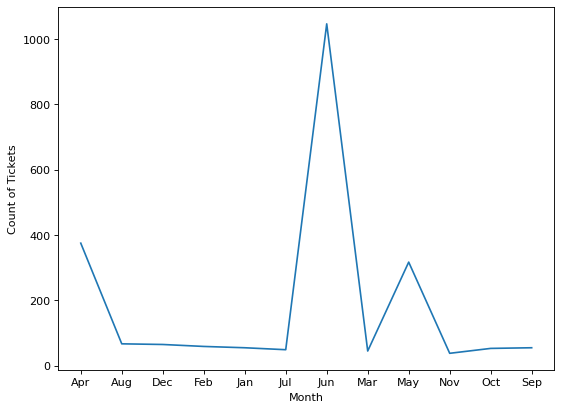

In [13]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = sns.lineplot(x = groupby_month.index,y = groupby_month.values)
ax.set(ylabel='Count of Tickets', xlabel='Month')
plt.show()

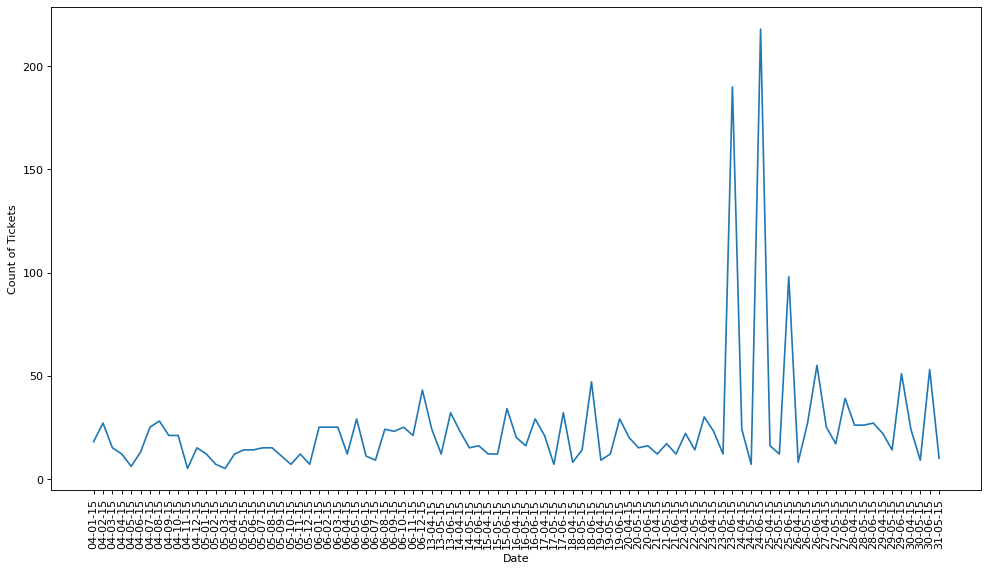

In [14]:
figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
ax = sns.lineplot(x = groupby_date.index,y=groupby_date.values)
ax.set(xlabel='Date', ylabel='Count of Tickets')
plt.xticks(groupby_date.index,groupby_date.index, rotation='vertical')
plt.show()

# 3)Provide a table with the frequency of complaint types.

In [15]:
# keeping a copy of original data 
df = raw_df.copy(deep=True)

In [16]:
import nltk
df["complaint"] = df["complaint"].astype(str)
df["complaint"] = df["complaint"].str.lower()
df.head()

,ticket,complaint,dateN,dateT,time,issuedBy,city,state,zip,status,behalf,month
0,250635,comcast cable internet speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Apr
1,223441,payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Aug
2,242732,speed and service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Apr
3,277946,comcast imposed a new usage cap of 300gb that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Jul
4,307175,comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May


In [17]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
stopwordSet = set(stopwords.words('english'))
stopwordSet.update(["comcast","telecom","issue","complaint"])
len(stopwordSet)

183

In [18]:
def identify_tokens(row):
    complaint = row['complaint']
    tokens = nltk.word_tokenize(complaint)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    token_stopwords = [w for w in token_words if w not in stopwordSet]
    token_lem = [lemmatizer.lemmatize(w) for w in token_stopwords]
    
    return token_lem

In [19]:
df['tokens'] = df.apply(identify_tokens, axis=1)
df['tokens'].head(10)

0                             [cable, internet, speed]
1     [payment, disappear, service, got, disconnected]
2                                     [speed, service]
3      [imposed, new, usage, cap, punishes, streaming]
4                             [working, service, boot]
5    [isp, charging, arbitrary, data, limit, overag...
6       [throttling, service, unreasonable, data, cap]
7       [refuse, help, troubleshoot, correct, service]
8                                   [extended, outage]
9                     [raising, price, available, ask]
Name: tokens, dtype: object

In [20]:
df.head()

,ticket,complaint,dateN,dateT,time,issuedBy,city,state,zip,status,behalf,month,tokens
0,250635,comcast cable internet speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Apr,"[cable, internet, speed]"
1,223441,payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Aug,"[payment, disappear, service, got, disconnected]"
2,242732,speed and service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Apr,"[speed, service]"
3,277946,comcast imposed a new usage cap of 300gb that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Jul,"[imposed, new, usage, cap, punishes, streaming]"
4,307175,comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May,"[working, service, boot]"


In [21]:
# using ngram to get more meaning from the text and group similar ones
from nltk.util import ngrams
from nltk import everygrams,word_tokenize
from itertools import chain

In [22]:
df['ngrams'] = df['complaint'].apply(lambda x: [' '.join(ng) for ng in everygrams(word_tokenize(x), 1, 3)])
df.head()

,ticket,complaint,dateN,dateT,time,issuedBy,city,state,zip,status,behalf,month,tokens,ngrams
0,250635,comcast cable internet speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Apr,"[cable, internet, speed]","[comcast, cable, internet, speeds, comcast cab..."
1,223441,payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Aug,"[payment, disappear, service, got, disconnected]","[payment, disappear, -, service, got, disconne..."
2,242732,speed and service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Apr,"[speed, service]","[speed, and, service, speed and, and service, ..."
3,277946,comcast imposed a new usage cap of 300gb that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Jul,"[imposed, new, usage, cap, punishes, streaming]","[comcast, imposed, a, new, usage, cap, of, 300..."
4,307175,comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May,"[working, service, boot]","[comcast, not, working, and, no, service, to, ..."


In [23]:
def cleanData(olist):
    return [l for l in olist if l not in stopwordSet]

In [24]:
df['ngrams'] = df['ngrams'].apply(cleanData)
df.head()

,ticket,complaint,dateN,dateT,time,issuedBy,city,state,zip,status,behalf,month,tokens,ngrams
0,250635,comcast cable internet speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Apr,"[cable, internet, speed]","[cable, internet, speeds, comcast cable, cable..."
1,223441,payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Aug,"[payment, disappear, service, got, disconnected]","[payment, disappear, -, service, got, disconne..."
2,242732,speed and service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Apr,"[speed, service]","[speed, service, speed and, and service, speed..."
3,277946,comcast imposed a new usage cap of 300gb that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Jul,"[imposed, new, usage, cap, punishes, streaming]","[imposed, new, usage, cap, 300gb, punishes, st..."
4,307175,comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May,"[working, service, boot]","[working, service, boot, comcast not, not work..."


In [25]:
import string
def get_all_ngrams(data,col):
    all_ngrams = []
    for i in range(len(data)):
        each_row = data.iloc[i,col]
        for j in range(len(each_row)):
            tok = each_row[j]
            #print(tok)
            all_ngrams.append(tok)
    all_ngrams = [ng.translate(str.maketrans('', '', string.punctuation)) for ng in all_ngrams ] 
    all_ngrams = [ng for ng in all_ngrams if len(ng)>1]
    all_ngrams = [ng for ng in all_ngrams if ng not in stopwordSet]  
    all_ngrams = [lemmatizer.lemmatize(w) for w in all_ngrams]
    return all_ngrams

In [26]:
all_ngrams = get_all_ngrams(df,13)
len(all_ngrams)

21323

In [27]:
#finding all unique ngram values and getting their frequency
#using the unique word as the index of the dataframe

In [28]:
unique, counts = np.unique(all_ngrams, return_counts=True)
frequency_df = pd.DataFrame(np.asarray(( counts)).T,columns=["frequency"],index=unique)
sorted_freq = frequency_df.sort_values(by="frequency",ascending=False)
sorted_freq[:20]

,frequency
internet,518
service,496
billing,283
data,219
speed,187
cap,181
comcast internet,123
comcast data,101
charge,94
customer,93


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
def getTopWOrds(corpus,n=None,ngram_len=1):
    vec = CountVectorizer(ngram_range=(1,ngram_len)).fit(corpus)
    bagOfWords = vec.transform(corpus)
    sum_words = bagOfWords.sum(axis=0)
    words_freq = [(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x:x[1],reverse=True)
    return words_freq[:n]

In [30]:
topwords = getTopWOrds(df["complaint"],ngram_len=2)
topwords

[('comcast', 1246),
 ('internet', 535),
 ('service', 456),
 ('billing', 294),
 ('and', 279),
 ('data', 219),
 ('to', 187),
 ('for', 180),
 ('comcast internet', 130),
 ('speed', 122),
 ('of', 111),
 ('cap', 106),
 ('comcast data', 103),
 ('xfinity', 103),
 ('not', 97),
 ('customer', 94),
 ('issues', 93),
 ('internet service', 87),
 ('my', 84),
 ('data cap', 81),
 ('caps', 78),
 ('with', 77),
 ('customer service', 76),
 ('practices', 74),
 ('comcast billing', 74),
 ('speeds', 72),
 ('complaint', 71),
 ('charges', 71),
 ('no', 68),
 ('data caps', 66),
 ('comcast xfinity', 65),
 ('bill', 64),
 ('on', 59),
 ('unfair', 59),
 ('cable', 56),
 ('services', 55),
 ('throttling', 54),
 ('me', 50),
 ('billing practices', 50),
 ('slow', 49),
 ('in', 49),
 ('usage', 47),
 ('internet speed', 47),
 ('is', 47),
 ('comcast service', 45),
 ('poor', 45),
 ('the', 44),
 ('pricing', 42),
 ('by', 41),
 ('price', 40),
 ('from', 39),
 ('connection', 37),
 ('over', 37),
 ('data usage', 34),
 ('service and', 33),

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [32]:
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(df["complaint"])

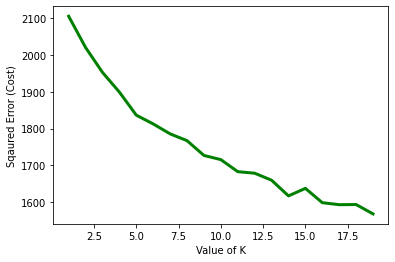

In [33]:
# Using Elbow method to determine number of clusters
cost =[] 
for i in range(1, 20): 
    KM = KMeans(n_clusters = i, max_iter = 2000) 
    KM.fit(X) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, 20), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() 

In [34]:
#chosing 6 means as the areas of interest are mainly around 6 types of issues
# The optimum k values using elbow method = 6
true_k = 6
model = KMeans(n_clusters=true_k, init='random', max_iter=100, n_init=20,tol=0.000001,random_state=1)
model.fit(X)

KMeans(init='random', max_iter=100, n_clusters=6, n_init=20, random_state=1,
       tol=1e-06)

In [35]:
print("Top 5 terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print("\n")

Top 5 terms per cluster:
Cluster 0:
 data
 cap
 caps
 comcast
 usage
 limit
 300gb
 internet
 charges
 meter


Cluster 1:
 comcast
 internet
 complaint
 essentials
 equipment
 erroneous
 error
 errors
 escalation
 esl01877347


Cluster 2:
 service
 comcast
 internet
 customer
 poor
 complaint
 xfinity
 issues
 terrible
 horrible


Cluster 3:
 internet
 comcast
 speed
 xfinity
 speeds
 throttling
 charges
 cable
 slow
 services


Cluster 4:
 unfair
 practices
 billing
 pricing
 comcast
 throttling
 internet
 xfinity
 bundles
 policies


Cluster 5:
 billing
 comcast
 issues
 service
 practices
 internet
 complaint
 issue
 fraudulent
 dispute




# 4)Which complaint types are maximum

In [36]:
df["cluster"] = model.labels_ 
df.head()

,ticket,complaint,dateN,dateT,time,issuedBy,city,state,zip,status,behalf,month,tokens,ngrams,cluster
0,250635,comcast cable internet speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Apr,"[cable, internet, speed]","[cable, internet, speeds, comcast cable, cable...",3
1,223441,payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Aug,"[payment, disappear, service, got, disconnected]","[payment, disappear, -, service, got, disconne...",3
2,242732,speed and service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Apr,"[speed, service]","[speed, service, speed and, and service, speed...",2
3,277946,comcast imposed a new usage cap of 300gb that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Jul,"[imposed, new, usage, cap, punishes, streaming]","[imposed, new, usage, cap, 300gb, punishes, st...",3
4,307175,comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May,"[working, service, boot]","[working, service, boot, comcast not, not work...",2


In [37]:
groupby_cluster = df.groupby([model.labels_])["ticket"].count()
groupby_cluster

0     207
1     163
2     292
3    1306
4      56
5     200
Name: ticket, dtype: int64

In [38]:
# Maximum tickets belong to cluster 0 which relate to [internet,high throttling,slow connection ,price,paying]

# 5)Create a new categorical variable with value as Open and Closed.

In [39]:
def change_status(status):
    if status in ["Open","Pending"]:
        return "OPEN"
    elif status in ["Closed","Solved"]:
        return "CLOSED"

In [40]:
df["updated_status"] = df["status"].apply(change_status)
df.head()

,ticket,complaint,dateN,dateT,time,issuedBy,city,state,zip,status,behalf,month,tokens,ngrams,cluster,updated_status
0,250635,comcast cable internet speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Apr,"[cable, internet, speed]","[cable, internet, speeds, comcast cable, cable...",3,CLOSED
1,223441,payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Aug,"[payment, disappear, service, got, disconnected]","[payment, disappear, -, service, got, disconne...",3,CLOSED
2,242732,speed and service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Apr,"[speed, service]","[speed, service, speed and, and service, speed...",2,CLOSED
3,277946,comcast imposed a new usage cap of 300gb that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Jul,"[imposed, new, usage, cap, punishes, streaming]","[imposed, new, usage, cap, 300gb, punishes, st...",3,OPEN
4,307175,comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May,"[working, service, boot]","[working, service, boot, comcast not, not work...",2,CLOSED


# 6)Provide state wise status of complaints in a stacked bar chart. Use the categorized variable 

In [41]:
groupby_state = (df.groupby(df['state']))["ticket"].count()
groupby_state

state
Alabama                  26
Arizona                  20
Arkansas                  6
California              220
Colorado                 80
Connecticut              12
Delaware                 12
District Of Columbia     16
District of Columbia      1
Florida                 240
Georgia                 288
Illinois                164
Indiana                  59
Iowa                      1
Kansas                    2
Kentucky                  7
Louisiana                13
Maine                     5
Maryland                 78
Massachusetts            61
Michigan                115
Minnesota                33
Mississippi              39
Missouri                  4
Montana                   1
Nevada                    1
New Hampshire            12
New Jersey               75
New Mexico               15
New York                  6
North Carolina            3
Ohio                      3
Oregon                   49
Pennsylvania            130
Rhode Island              1
South Carolina

In [42]:
groupby_state.index

Index(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District Of Columbia',
       'District of Columbia', 'Florida', 'Georgia', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
       'Montana', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'Ohio', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia'],
      dtype='object', name='state')

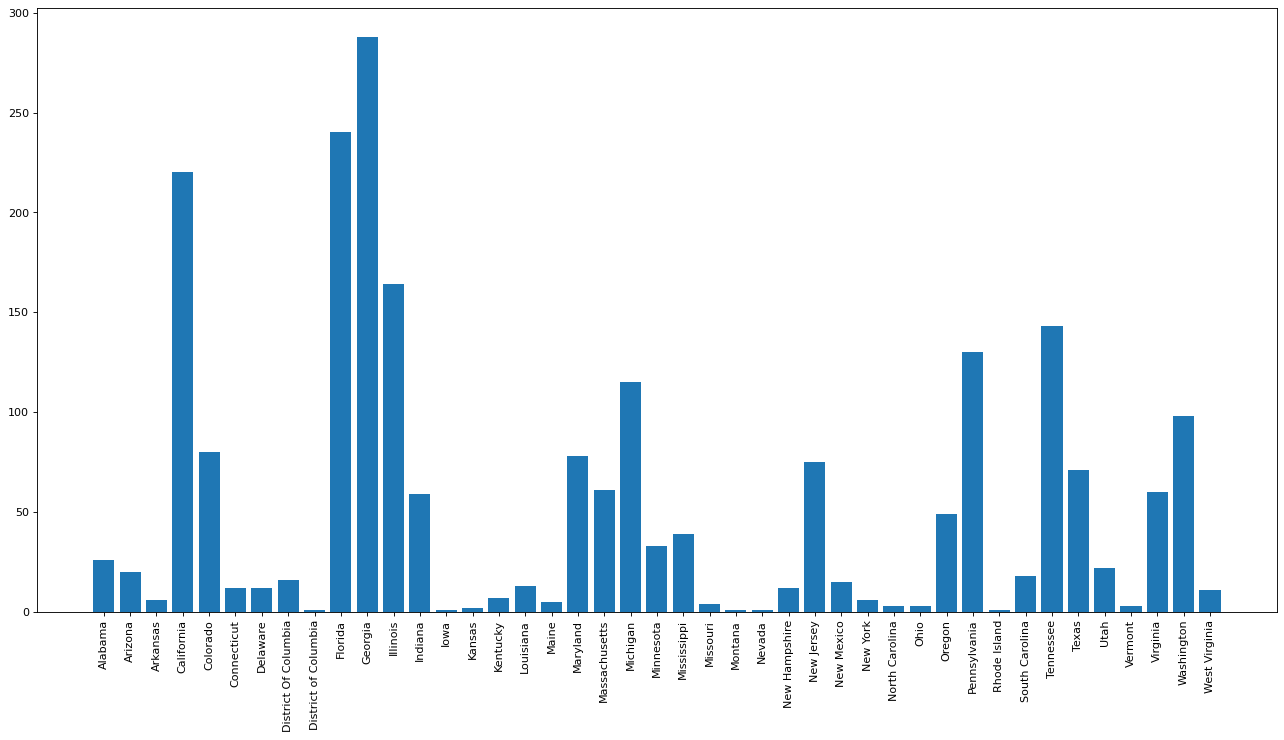

In [43]:
figure(num=None, figsize=(20, 10), dpi=80)
plt.bar(x=groupby_state.index,height = groupby_state.values)
plt.xticks(groupby_state.index, groupby_state.index, rotation='vertical')
plt.show()

In [44]:
groupby_state_ustatus = df.groupby(['state','updated_status'])["ticket"].count()
groupby_state_ustatus

state                 updated_status
Alabama               CLOSED             17
                      OPEN                9
Arizona               CLOSED             14
                      OPEN                6
Arkansas              CLOSED              6
California            CLOSED            159
                      OPEN               61
Colorado              CLOSED             58
                      OPEN               22
Connecticut           CLOSED              9
                      OPEN                3
Delaware              CLOSED              8
                      OPEN                4
District Of Columbia  CLOSED             14
                      OPEN                2
District of Columbia  CLOSED              1
Florida               CLOSED            201
                      OPEN               39
Georgia               CLOSED            208
                      OPEN               80
Illinois              CLOSED            135
                      OPEN             

In [45]:
group_values = groupby_state_ustatus.unstack().fillna(0)
group_values

updated_status,CLOSED,OPEN
state,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


In [46]:
closedTickets = group_values["CLOSED"]
openTickets = group_values["OPEN"]

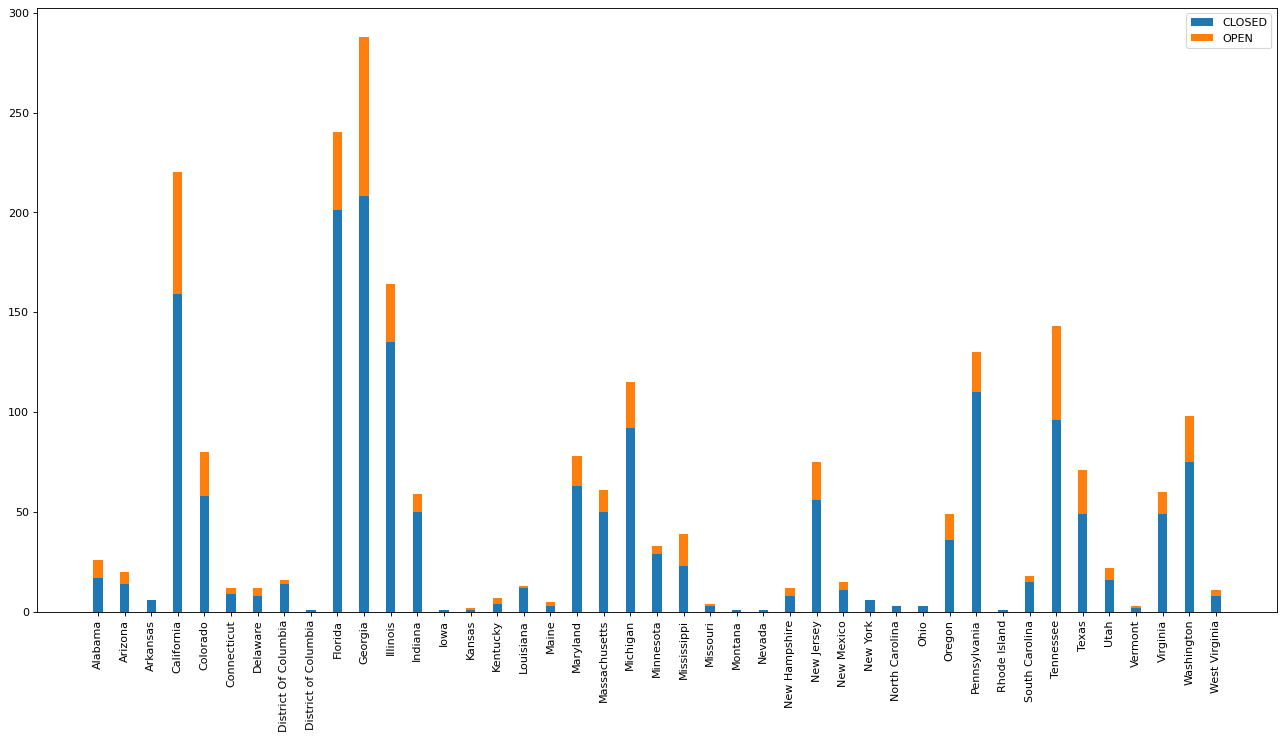

In [47]:
figure(num=None, figsize=(20, 10), dpi=80)
p1 = plt.bar(groupby_state.index, closedTickets, 0.35)
p2 = plt.bar(groupby_state.index, openTickets, 0.35,bottom=closedTickets)
plt.xticks(groupby_state.index, groupby_state.index, rotation='vertical')
plt.legend((p1[0], p2[0]), ('CLOSED', 'OPEN'))
plt.show()

#  7)Which state has the maximum complaints

In [48]:
maxTickets = group_values.idxmax()
maxTickets

updated_status
CLOSED    Georgia
OPEN      Georgia
dtype: object

In [49]:
# Clearly Georgia has the maximum number of tickets

# 8)Which state has the highest percentage of unresolved complaints

In [50]:
totalTickets = np.add(openTickets,closedTickets)
percentOpen = np.divide(openTickets,totalTickets)
percentOpen.sort_values(ascending=False)

state
Kansas                  0.500000
Kentucky                0.428571
Mississippi             0.410256
Maine                   0.400000
Alabama                 0.346154
New Hampshire           0.333333
Vermont                 0.333333
Delaware                0.333333
Tennessee               0.328671
Texas                   0.309859
Arizona                 0.300000
Georgia                 0.277778
California              0.277273
Colorado                0.275000
West Virginia           0.272727
Utah                    0.272727
New Mexico              0.266667
Oregon                  0.265306
New Jersey              0.253333
Connecticut             0.250000
Missouri                0.250000
Washington              0.234694
Michigan                0.200000
Maryland                0.192308
Virginia                0.183333
Massachusetts           0.180328
Illinois                0.176829
South Carolina          0.166667
Florida                 0.162500
Pennsylvania            0.153846
Indi

In [51]:
# Kansas have maximum percentage of unresolved tickets amongst the states

# 9)Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [52]:
groupby_resolved_internet_calls = df.groupby(["issuedBy","updated_status"])["ticket"].count()
issuedby = groupby_resolved_internet_calls.unstack()
issuedby

updated_status,CLOSED,OPEN
issuedBy,,
Customer Care Call,864,255
Internet,843,262


In [53]:
closedCCC = issuedby.loc["Customer Care Call","CLOSED"]
totalCCC = issuedby.loc["Customer Care Call","CLOSED"]+issuedby.loc["Customer Care Call","OPEN"]
closedIN = issuedby.loc["Internet","CLOSED"]
totalIN = issuedby.loc["Internet","CLOSED"]+issuedby.loc["Internet","OPEN"]

resolvedCCC = (closedCCC / totalCCC)*100
resolvedIN = (closedIN / totalIN)*100

print("Customer Care Call - Resolved %  : ",resolvedCCC)
print("Internet - Resolved %  : ",resolvedIN)


Customer Care Call - Resolved %  :  77.21179624664879
Internet - Resolved %  :  76.289592760181
